In [54]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My Drive/Colab Notebooks/capstone

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/capstone'
/content/drive/My Drive/Colab Notebooks/capstone


In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 384.1 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *
#from pytorch_tabnet.tab_model import TabNetClassifier

In [75]:
'''
params options

na_data will fill missing data with 'unknown', delete missing data or do nothing
input options are...
    * 'fill'
    * 'drop'
    * False

drop_outlier_days removes pets who have a lenght of stay exceeding the value YOU enter
input options are...
    * False
    * or any integer

sample_dict controls stratified sampling
    * stratify_col: a column name used for stratified sampling... spelling and caps must be exact
    * train_size: a fraction of data you want for the training data
    * validate_size: a fraction of data you want for the validate data
    * test_size: a fraction of data you want for the test data
'''

# params = {
#         'na_data': 'fill',
#         'drop_outlier_days': 350,
#         'embed':True,
#         'num_buckets':5,
#         'sample_dict':
#             {
#             'stratify_col':'Type',
#             'train_size':0.6, 'validate_size':0.2, 'test_size':0.2
#             }
#         }


params = {
        'na_data': 'fill',
        'drop_outlier_days': 300,
        'embed':True,
        'buckets':[-1,3,14,30,100,99999999],
        'sample_dict':
            {
            'stratify_col':'Type',
            'train_size':0.7, 'validate_size':0.1, 'test_size':0.2
            }
        }


train_df, validate_df, test_df = load_df(params)
df = pd.concat([train_df, validate_df, test_df], ignore_index=True) # do this if you want to look at all the data still


Date Of Birth is NOT A STRING
Intake Date is NOT A STRING
Outcome Date is NOT A STRING
Days in Shelter is NOT A STRING
Count is NOT A STRING
replace null values in Name with 'Unknown'
replace null values in Size with 'Unknown'
replace null values in Outcome_Type with 'Unknown'
replace null values in Outcome_Subtype with 'Unknown'
replace null values in Outcome_Condition with 'Unknown'
replace null values in Outcome_Jurisdiction with 'Unknown'
replace null values in Outcome_Zip_Code with 'Unknown'
replace null values in Location with 'Unknown'
Intake Date is NOT A STRING
Outcome Date is NOT A STRING
replace null values in Name with 'Unknown'
replace null values in Date_Of_Birth with 'Unknown'
replace null values in Outcome_Type with 'Unknown'
replace null values in Intake_Subtype with 'Unknown'
replace null values in Outcome_Subtype with 'Unknown'
replace null values in Outcome_Condition with 'Unknown'


/Users/jessicahuber/source/capstone/load_Austin.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Of Birth'].fillna('01/01/1900', inplace=True)


Date Of Birth is NOT A STRING
Intake Date is NOT A STRING
Outcome Date is NOT A STRING
Days in Shelter is NOT A STRING
replace null values in Name with 'Unknown'
replace null values in Outcome_Subtype with 'Unknown'
replace null values in Size with 'Unknown'
replace null values in Impound_Number with 'Unknown'
replace null values in Kennel_Number with 'Unknown'
replace null values in Animal_ID with 'Unknown'
replace null values in Intake_Type with 'Unknown'
replace null values in Intake_Subtype with 'Unknown'
replace null values in Outcome_Condition with 'Unknown'
replace null values in Intake_Jurisdiction with 'Unknown'
replace null values in Outcome_Jurisdiction with 'Unknown'
replace null values in Outcome_Zip_Code with 'Unknown'
replace null values in Location with 'Unknown'
replace null values in Multiple_Visit_Count with 'np.nan'
replace null values in Age_inDays_at_Income with 'np.nan'
replace null values in Age_Group with 'Unknown'
replace null values in Is_Mixed_Breed with 'np

/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [76]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date_Of_Birth',
       'Impound_Number', 'Kennel_Number', 'Animal_ID', 'Intake_Date',
       'Outcome_Date', 'Days_in_Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome_Type', 'Outcome_Subtype', 'Intake_Condition',
       'Outcome_Condition', 'Intake_Jurisdiction', 'Outcome_Jurisdiction',
       'Outcome_Zip_Code', 'Location', 'Multiple_Visit_Count',
       'Age_inDays_at_Income', 'Age_Group', 'Has_Name', 'Is_Fixed',
       'Is_Mixed_Breed', 'Is_Multicolor', 'dataset', 'Is_Aggressive',
       'Color_Embedding', 'Color_Embedding_Cluster', 'Breed_Embedding',
       'Breed_Embedding_Cluster', 'Intake_Subtype_Embedding',
       'Subtype_Embedding_Cluster', 'Days_in_Shelter_Label'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205130 entries, 0 to 205129
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Name                       205130 non-null  object        
 1   Type                       205130 non-null  object        
 2   Breed                      205130 non-null  object        
 3   Color                      205130 non-null  object        
 4   Sex                        205130 non-null  object        
 5   Size                       205130 non-null  object        
 6   Date_Of_Birth              205130 non-null  object        
 7   Impound_Number             205130 non-null  object        
 8   Kennel_Number              205130 non-null  object        
 9   Animal_ID                  205130 non-null  object        
 10  Intake_Date                205130 non-null  datetime64[ns]
 11  Outcome_Date               205130 non-null  datetime

In [78]:
df.describe()

,Days_in_Shelter,Multiple_Visit_Count,Age_inDays_at_Income,Has_Name,Is_Fixed,Is_Mixed_Breed,Is_Multicolor,Is_Aggressive,Color_Embedding_Cluster,Breed_Embedding_Cluster,Subtype_Embedding_Cluster
count,205130.000000,205130.000000,205130.000000,205130.000000,205130.000000,205130.000000,205130.000000,205130.000000,205130.000000,205130.000000,205130.000000
mean,23.706479,2.013435,1839.886833,0.548052,0.359177,0.577453,0.448828,-0.936889,0.889265,1.729591,0.413962
std,43.141609,8.989687,6755.319819,0.497687,0.479760,0.608461,0.611233,0.243163,1.123042,1.288666,0.958427
min,0.000000,-1.000000,-1555.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,61.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000
50%,7.000000,1.000000,365.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,2.000000,0.000000
75%,25.000000,1.000000,1095.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,3.000000,0.000000
max,299.000000,248.000000,45425.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,4.000000,4.000000


# Model V2

In [79]:
print(df['Days_in_Shelter_Label'].value_counts())

1    70272
0    66163
3    33371
2    23916
4    11408
Name: Days_in_Shelter_Label, dtype: int64


In [80]:
df['Date_Of_Birth'].head

<bound method NDFrame.head of 0         2022-04-02 00:00:00
1         2017-07-26 00:00:00
2         2016-07-01 00:00:00
3         2016-03-20 00:00:00
4         2023-03-22 00:00:00
                 ...         
205125    2008-04-29 00:00:00
205126    2013-03-01 00:00:00
205127    2014-05-12 00:00:00
205128    2013-03-26 00:00:00
205129    2016-10-07 00:00:00
Name: Date_Of_Birth, Length: 205130, dtype: object>

In [81]:
#
df['location_zipcode'] = df['Location'].str.extract(r'(\d+)(?=\()')
df['intake_year'] = df['Intake_Date'].dt.year
df['intake_month'] = df['Intake_Date'].dt.month
df['intake_day'] = df['Intake_Date'].dt.day

df['Date_Of_Birth'] = pd.to_datetime(df['Date_Of_Birth'], errors='coerce')
df['birth_year'] = df['Date_Of_Birth'].dt.year
df['birth_month'] = df['Date_Of_Birth'].dt.month
df['birth_day'] = df['Date_Of_Birth'].dt.day


In [82]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date_Of_Birth',
       'Impound_Number', 'Kennel_Number', 'Animal_ID', 'Intake_Date',
       'Outcome_Date', 'Days_in_Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome_Type', 'Outcome_Subtype', 'Intake_Condition',
       'Outcome_Condition', 'Intake_Jurisdiction', 'Outcome_Jurisdiction',
       'Outcome_Zip_Code', 'Location', 'Multiple_Visit_Count',
       'Age_inDays_at_Income', 'Age_Group', 'Has_Name', 'Is_Fixed',
       'Is_Mixed_Breed', 'Is_Multicolor', 'dataset', 'Is_Aggressive',
       'Color_Embedding', 'Color_Embedding_Cluster', 'Breed_Embedding',
       'Breed_Embedding_Cluster', 'Intake_Subtype_Embedding',
       'Subtype_Embedding_Cluster', 'Days_in_Shelter_Label',
       'location_zipcode', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day'],
      dtype='object')

In [83]:
df_model_v1 = df.drop(columns=[
  'Name',
  'Impound_Number',
  'Animal_ID',
  'Outcome_Date',
  'Days_in_Shelter',
  'Outcome_Type',
  'Outcome_Subtype',
  'Outcome_Condition',
  'Outcome_Jurisdiction',
  'Outcome_Zip_Code',
  'Location',
  'Intake_Date',
  'Date_Of_Birth',
  'location_zipcode',
  'Color_Embedding',
  'Breed_Embedding'
  ])
df_model_v1.columns

Index(['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Income', 'Age_Group', 'Has_Name',
       'Is_Fixed', 'Is_Mixed_Breed', 'Is_Multicolor', 'dataset',
       'Is_Aggressive', 'Color_Embedding_Cluster', 'Breed_Embedding_Cluster',
       'Intake_Subtype_Embedding', 'Subtype_Embedding_Cluster',
       'Days_in_Shelter_Label', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day'],
      dtype='object')

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical features
label_encoders = {}
for column in ['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number','Intake_Type','Intake_Subtype','Intake_Condition','Intake_Jurisdiction','Age_Group']:
    le = LabelEncoder()
    df_model_v1[column] = le.fit_transform(df_model_v1[column])
    label_encoders[column] = le

In [100]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [85]:
df_model_v1.dtypes

Type                            int64
Breed                           int64
Color                           int64
Sex                             int64
Size                            int64
Kennel_Number                   int64
Intake_Type                     int64
Intake_Subtype                  int64
Intake_Condition                int64
Intake_Jurisdiction             int64
Multiple_Visit_Count          float64
Age_inDays_at_Income          float64
Age_Group                       int64
Has_Name                        int64
Is_Fixed                        int64
Is_Mixed_Breed                float64
Is_Multicolor                 float64
dataset                        object
Is_Aggressive                 float64
Color_Embedding_Cluster         int32
Breed_Embedding_Cluster         int32
Intake_Subtype_Embedding       object
Subtype_Embedding_Cluster       int32
Days_in_Shelter_Label        category
intake_year                     int64
intake_month                    int64
intake_day  

In [86]:
# Define features and target

df_sonoma = df_model_v1[df_model_v1['dataset'] == 'Sonoma']

df_austin = df_model_v1[df_model_v1['dataset'] == 'Austin']
df_denver = df_model_v1[df_model_v1['dataset'] == 'Denver']

X = df_model_v1[['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Income', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'Color_Embedding_Cluster', 'Breed_Embedding_Cluster', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day']]
y = df_model_v1['Days_in_Shelter_Label']

X_df_sonoma = df_sonoma[['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Income', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'Color_Embedding_Cluster', 'Breed_Embedding_Cluster', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day']]
y_df_sonoma = df_sonoma['Days_in_Shelter_Label']

X_df_austin = df_austin[['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Income', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'Color_Embedding_Cluster', 'Breed_Embedding_Cluster', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day']]
y_df_austin = df_austin['Days_in_Shelter_Label']

X_df_denver = df_denver[['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Income', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'Color_Embedding_Cluster', 'Breed_Embedding_Cluster', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day']]
y_df_denver = df_denver['Days_in_Shelter_Label']

In [87]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [89]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



X_df_sonoma = scaler.transform(X_df_sonoma)
X_df_austin = scaler.transform(X_df_austin)
X_df_denver = scaler.transform(X_df_denver)

/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  


In [112]:
multi_stage_df = df_model_v1.copy()
multi_stage_df['Days_in_Shelter_Label_Combined'] = multi_stage_df['Days_in_Shelter_Label'].replace({1: 1, 2: 1, 3: 1, 4: 2})
multi_stage_df_sonoma = multi_stage_df[multi_stage_df['dataset'] == 'Sonoma']


In [113]:
multi_stage_df_sonoma['Days_in_Shelter_Label'].value_counts()

0    9362
1    6327
2    4671
3    4398
4     477
Name: Days_in_Shelter_Label, dtype: int64

In [114]:
multi_stage_df_sonoma['Days_in_Shelter_Label_Combined'].value_counts()

1    15396
0     9362
2      477
Name: Days_in_Shelter_Label_Combined, dtype: int64

First Stage Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1852
           1       0.87      0.87      0.87      3104
           2       0.62      0.16      0.26        91

    accuracy                           0.84      5047
   macro avg       0.77      0.62      0.65      5047
weighted avg       0.84      0.84      0.84      5047



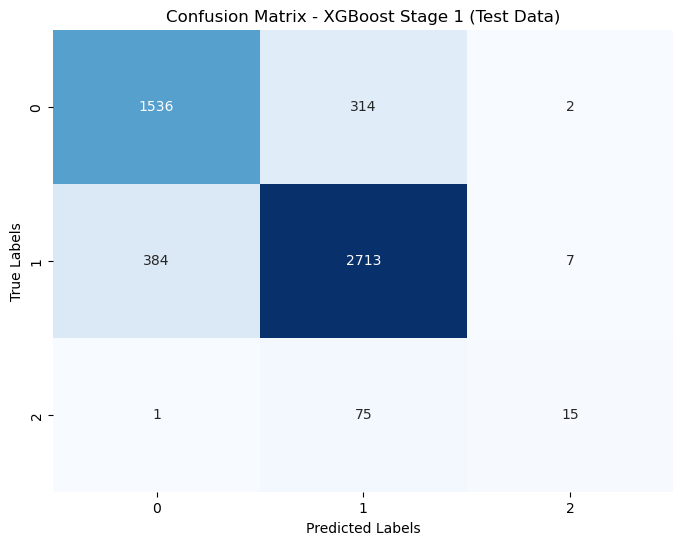

In [120]:
X_sonoma_combined = multi_stage_df_sonoma[['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Income', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'Color_Embedding_Cluster', 'Breed_Embedding_Cluster', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day']]
y_sonoma_combined = multi_stage_df_sonoma['Days_in_Shelter_Label_Combined']

# Train-test split for the first stage model
X_train_sonoma_combined, X_test_sonoma_combined, y_train_sonoma_combined, y_test_sonoma_combined = train_test_split(
    X_sonoma_combined, y_sonoma_combined, test_size=0.2, random_state=42
)

# Train the first stage XGBoost model
xgb_model_stage1 = XGBClassifier(random_state=42)
xgb_model_stage1.fit(X_train_sonoma_combined, y_train_sonoma_combined)

# Predict and evaluate the first stage model
y_pred_stage1_train = xgb_model_stage1.predict(X_train_sonoma_combined)
y_pred_stage1_test = xgb_model_stage1.predict(X_test_sonoma_combined)
print("First Stage Classification Report (Test Data):")
print(classification_report(y_test_sonoma_combined, y_pred_stage1_test))

# Confusion matrix for the first stage (Test Data)
cm_stage1_test = confusion_matrix(y_test_sonoma_combined, y_pred_stage1_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stage1_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Stage 1 (Test Data)')
plt.show()


/var/folders/dd/n43vxtv12gb_w60v_ch3636r0000gn/T/ipykernel_95639/4092026050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_stage_df_sonoma_subset['Days_in_Shelter_Label_Subset'] = multi_stage_df_sonoma_subset['Days_in_Shelter_Label'].replace({1: 0, 2: 1, 3: 2})


Second Stage Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1242
           1       0.51      0.46      0.48       915
           2       0.69      0.63      0.66       923

    accuracy                           0.64      3080
   macro avg       0.63      0.62      0.62      3080
weighted avg       0.63      0.64      0.63      3080



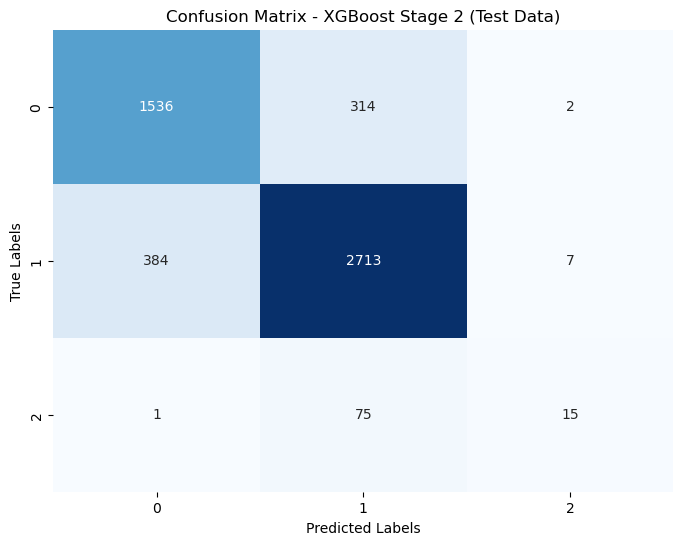

In [124]:
multi_stage_df_sonoma_subset = multi_stage_df_sonoma[multi_stage_df_sonoma['Days_in_Shelter_Label'].isin([1, 2, 3])]
multi_stage_df_sonoma_subset['Days_in_Shelter_Label_Subset'] = multi_stage_df_sonoma_subset['Days_in_Shelter_Label'].replace({1: 0, 2: 1, 3: 2})
X_sonoma_subset_class = multi_stage_df_sonoma_subset[['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Income', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'Color_Embedding_Cluster', 'Breed_Embedding_Cluster', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day']]
y_sonoma_subset_class = multi_stage_df_sonoma_subset['Days_in_Shelter_Label_Subset']

# Train-test split for the first stage model
X_train_sonoma_subset_class, X_test_sonoma_subset_class, y_train_sonoma_subset_class, y_test_sonoma_subset_class = train_test_split(
    X_sonoma_subset_class, y_sonoma_subset_class, test_size=0.2, random_state=42
)

# Train the first stage XGBoost model
xgb_model_stage2 = XGBClassifier(random_state=42)
xgb_model_stage2.fit(X_train_sonoma_subset_class, y_train_sonoma_subset_class)

# Predict and evaluate the first stage model
y_pred_stage2_train = xgb_model_stage2.predict(X_train_sonoma_subset_class)
y_pred_stage2_test = xgb_model_stage2.predict(X_test_sonoma_subset_class)
print("Second Stage Classification Report (Test Data):")
print(classification_report(y_test_sonoma_subset_class, y_pred_stage2_test))

# Confusion matrix for the first stage (Test Data)
cm_stage2_test = confusion_matrix(y_test_sonoma_subset_class, y_pred_stage2_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stage1_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Stage 2 (Test Data)')
plt.show()


In [128]:
# Predict probabilities for all classes using the first stage model
probabilities_stage1 = xgb_model_stage1.predict_proba(X_test_sonoma_combined)

# Assuming class 0 as index 0, class 1 (combined) as index 1, and class 4 as index 2
predicted_classes_stage1 = np.argmax(probabilities_stage1, axis=1)



In [129]:
# Filter instances predicted to belong to the combined group (class 1)
combined_group_indices = (predicted_classes_stage1 == 1)
X_combined_group_test = X_test_sonoma_combined[combined_group_indices]


Second Stage Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      0.37      0.55      2713
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.43      3102
   macro avg       0.40      0.27      0.31      3102
weighted avg       0.98      0.43      0.58      3102



/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  


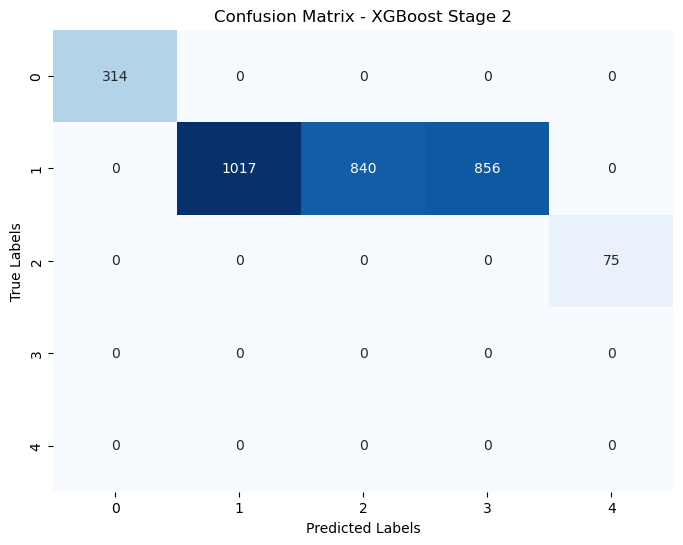

In [130]:
if not X_combined_group_test.empty:
    # Predict using the second stage model for instances predicted to be in the combined group (class 1)
    y_pred_stage2 = model_stage2.predict(X_combined_group_test)
    
    # Assuming the labels for combined group (class 1, 2, 3) are stored in y_combined_group_actual_test
    y_combined_group_actual_test = y_test_sonoma_combined[X_combined_group_test.index]

    print("Second Stage Classification Report:")
    print(classification_report(y_combined_group_actual_test, y_pred_stage2))

    # Confusion matrix for the second stage
    cm_stage2 = confusion_matrix(y_combined_group_actual_test, y_pred_stage2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_stage2, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - XGBoost Stage 2')
    plt.show()
else:
    print("No instances predicted to belong to the combined group (class 1).")


Classification Report for All 5 Classes:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1852
           1       1.00      0.33      0.49      3104
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.57      5047
   macro avg       0.37      0.27      0.28      5047
weighted avg       0.92      0.57      0.64      5047



/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  


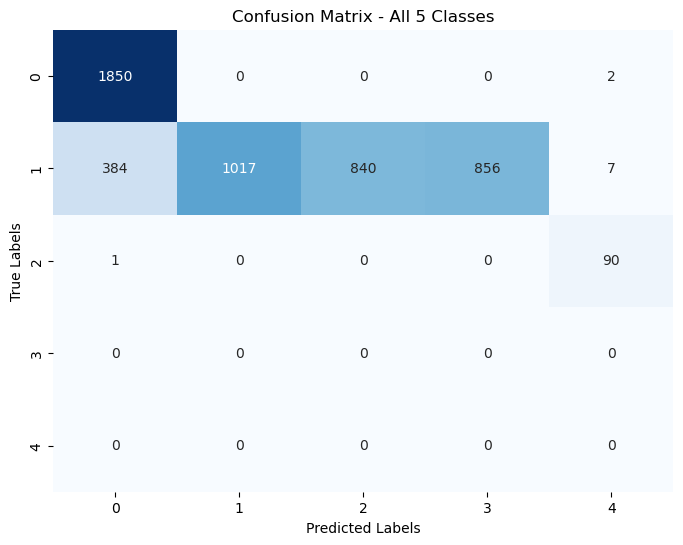

In [131]:
# Initialize final predictions with class 0 (index 0) for all instances
y_pred_final = np.zeros(len(X_test_sonoma_combined), dtype=int)

# Assign predicted labels based on probabilities_stage1
y_pred_final[predicted_classes_stage1 == 0] = 0  # Assign class 0
y_pred_final[predicted_classes_stage1 == 2] = 4  # Assign class 4

# For instances predicted as class 1 (combined), assign predictions from second stage
if not X_combined_group_test.empty:
    y_pred_final[combined_group_indices] = y_pred_stage2

# Evaluate and report performance for all 5 classes
print("Classification Report for All 5 Classes:")
print(classification_report(y_test_sonoma_combined, y_pred_final))

# Confusion matrix for all 5 classes
cm_all_classes = confusion_matrix(y_test_sonoma_combined, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_all_classes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - All 5 Classes')
plt.show()


## Recursive Feature Elimination with Random Forest

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1852
           1       0.58      0.57      0.57      1278
           2       0.47      0.38      0.42       924
           3       0.63      0.59      0.61       902
           4       0.53      0.25      0.34        91

    accuracy                           0.65      5047
   macro avg       0.60      0.54      0.55      5047
weighted avg       0.64      0.65      0.64      5047



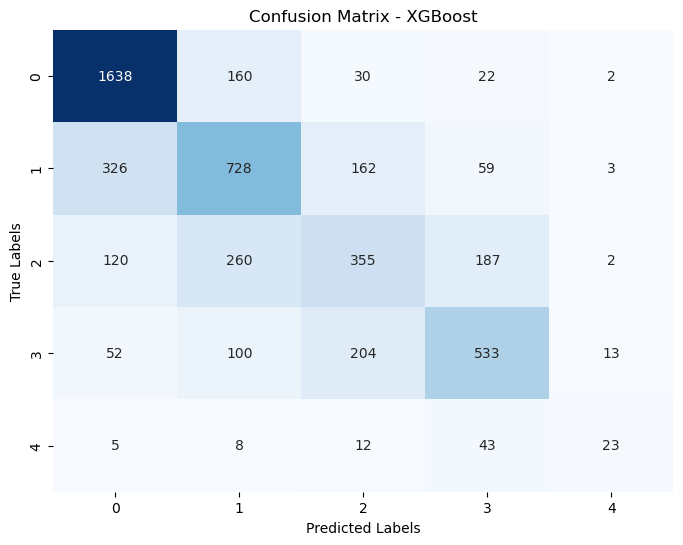

In [54]:
# Train XGBoost classifier
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_xgb = model_xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [98]:
import pickle

with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END 

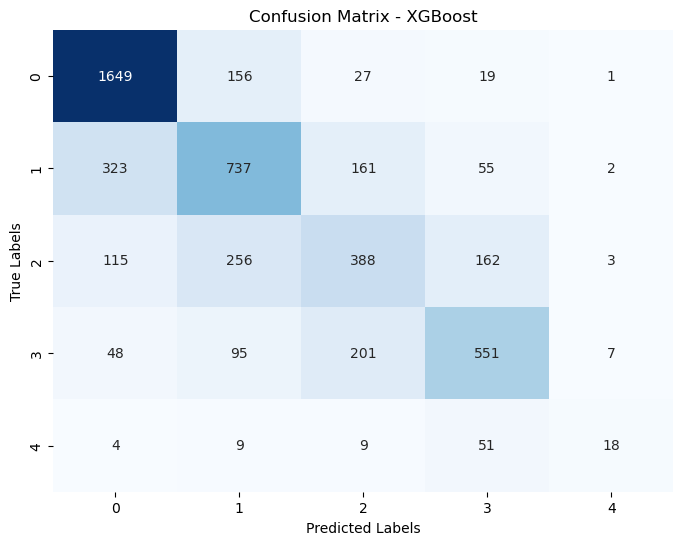

In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

model_xgb = XGBClassifier(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the XGBoost classifier with the best parameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_xgb = best_xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [ ]:
X_df_sonoma = scaler.transform(X_df_sonoma)
X_df_austin = scaler.transform(X_df_austin)
X_df_denver = scaler.transform(X_df_denver)



In [94]:
len(X_df_austin)

166949

In [95]:
len(X_df_denver)

12946

XGBoost Classification Report:


/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


              precision    recall  f1-score   support

           0       0.53      0.00      0.00     51079
           1       0.36      0.82      0.50     58695
           2       0.11      0.00      0.01     17849
           3       0.16      0.19      0.18     28414
           4       0.00      0.00      0.00     10912

    accuracy                           0.32    166949
   macro avg       0.23      0.20      0.14    166949
weighted avg       0.33      0.32      0.21    166949



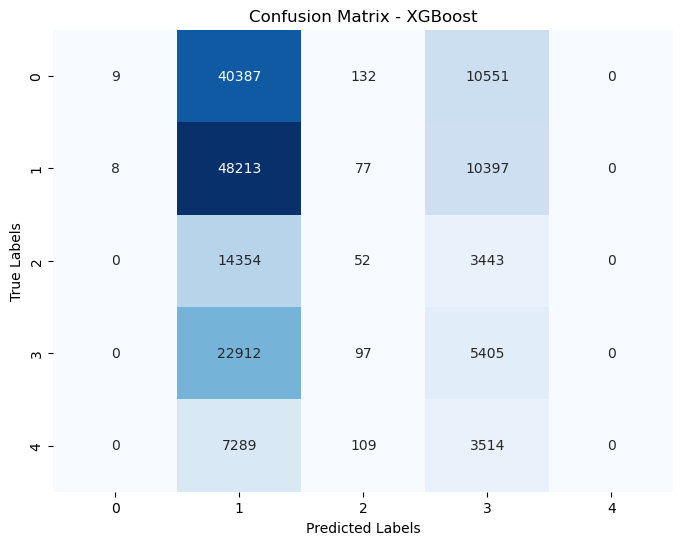

In [96]:
# Predict and evaluate the model
y_pred_xgb_austin = best_xgb.predict(X_df_austin)

print("XGBoost Classification Report:")
print(classification_report(y_df_austin, y_pred_xgb_austin))

# Confusion matrix for XGBoost
cm_xgb_austin = confusion_matrix(y_df_austin, y_pred_xgb_austin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_austin, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5722
           1       0.00      0.00      0.00      5250
           2       0.00      0.00      0.00      1396
           3       0.04      1.00      0.08       559
           4       0.00      0.00      0.00        19

    accuracy                           0.04     12946
   macro avg       0.01      0.20      0.02     12946
weighted avg       0.00      0.04      0.00     12946



/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  
/Users/jessicahuber/anaconda3/envs/datasci-207/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


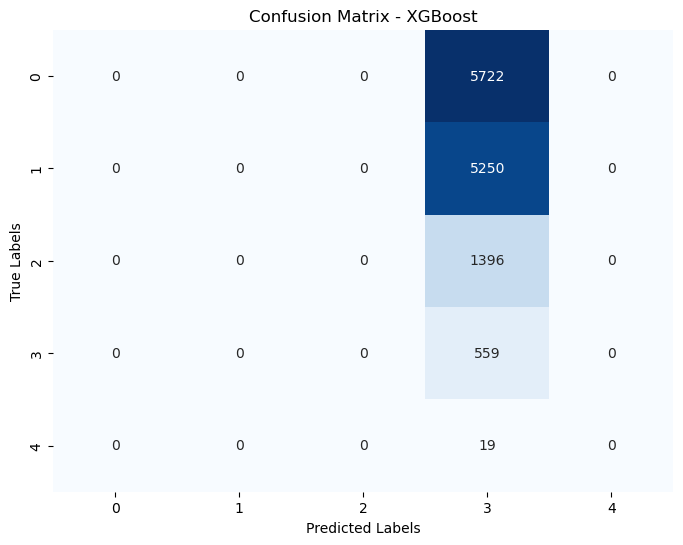

In [97]:
# Predict and evaluate the model
y_pred_xgb_denver = best_xgb.predict(X_df_denver)

print("XGBoost Classification Report:")
print(classification_report(y_df_denver, y_pred_xgb_denver))

# Confusion matrix for XGBoost
cm_xgb_denver = confusion_matrix(y_df_denver, y_pred_xgb_denver)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_denver, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [ ]:
# Perform Recursive Feature Elimination with Random Forest
model_rf_5 = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_5 = RFE(estimator=model_rf_5, n_features_to_select=5, step=1)
rfe_5.fit(X_train, y_train)

# Determine selected and eliminated features
# Get the ranking of the features
ranking_5 = rfe_5.ranking_
feature_names = X.columns

selected_features_5 = feature_names[rfe_5.support_]

print("Selected features:")
for feature in selected_features_5:
    print(feature)

Selected features:
Color
Kennel_Number
Age_inDays_at_Outcome
intake_day
birth_day


In [ ]:
# Perform Recursive Feature Elimination with Random Forest
model_rf_6 = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_6 = RFE(estimator=model_rf_6, n_features_to_select=6, step=1)
rfe_6.fit(X_train, y_train)

# Determine selected and eliminated features
# Get the ranking of the features
ranking_6 = rfe_6.ranking_
feature_names = X.columns

selected_features_6 = feature_names[rfe_6.support_]

print("Selected features:")
for feature in selected_features_6:
    print(feature)


Selected features:
Breed
Color
Kennel_Number
Age_inDays_at_Outcome
intake_day
birth_day


In [ ]:
# Perform Recursive Feature Elimination with Random Forest
model_rf_8 = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_8 = RFE(estimator=model_rf_8, n_features_to_select=8, step=1)
rfe_8.fit(X_train, y_train)

# Determine selected and eliminated features
# Get the ranking of the features
ranking_8 = rfe_8.ranking_
feature_names = X.columns

selected_features_8 = feature_names[rfe_8.support_]

print("Selected features:")
for feature in selected_features_8:
    print(feature)

Selected features:
Breed
Color
Kennel_Number
Age_inDays_at_Outcome
intake_year
intake_month
intake_day
birth_day


In [ ]:
# Perform Recursive Feature Elimination with Random Forest
model_rf_10 = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_10 = RFE(estimator=model_rf_10, n_features_to_select=10, step=1)
rfe_10.fit(X_train, y_train)

# Determine selected and eliminated features
# Get the ranking of the features
ranking_10 = rfe_10.ranking_
feature_names = X.columns

selected_features_10 = feature_names[rfe_10.support_]

print("Selected features:")
for feature in selected_features_10:
    print(feature)

Selected features:
Breed
Color
Kennel_Number
Age_inDays_at_Outcome
intake_year
intake_month
intake_day
birth_year
birth_month
birth_day


In [ ]:
# Perform Recursive Feature Elimination with Random Forest
model_rf_15 = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_15 = RFE(estimator=model_rf_15, n_features_to_select=15, step=1)
rfe_15.fit(X_train, y_train)

# Determine selected and eliminated features
# Get the ranking of the features
ranking_15 = rfe_15.ranking_
feature_names = X.columns

selected_features_15 = feature_names[rfe_15.support_]

print("Selected features:")
for feature in selected_features_15:
    print(feature)

Selected features:
Breed
Color
Size
Kennel_Number
Intake_Type
Intake_Subtype
Intake_Condition
Age_inDays_at_Outcome
Has_Name
intake_year
intake_month
intake_day
birth_year
birth_month
birth_day


In [ ]:
# Perform Recursive Feature Elimination with Random Forest
model_rf_18 = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_18 = RFE(estimator=model_rf_18, n_features_to_select=18, step=1)
rfe_18.fit(X_train, y_train)

# Determine selected and eliminated features
# Get the ranking of the features
ranking_18 = rfe_18.ranking_
feature_names = X.columns

selected_features_18 = feature_names[rfe_18.support_]

print("Selected features:")
for feature in selected_features_18:
    print(feature)

Selected features:
Breed
Color
Sex
Size
Kennel_Number
Intake_Type
Intake_Subtype
Intake_Condition
Age_inDays_at_Outcome
Has_Name
Color_Embedding_Cluster
Breed_Embedding_Cluster
intake_year
intake_month
intake_day
birth_year
birth_month
birth_day


In [ ]:
# Perform Recursive Feature Elimination with Random Forest
model_rf_20 = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_20 = RFE(estimator=model_rf_20, n_features_to_select=20, step=1)
rfe_20.fit(X_train, y_train)

# Determine selected and eliminated features
# Get the ranking of the features
ranking_20 = rfe_20.ranking_
feature_names = X.columns

selected_features_20 = feature_names[rfe_20.support_]

print("Selected features:")
for feature in selected_features_20:
    print(feature)

Selected features:
Breed
Color
Sex
Size
Kennel_Number
Intake_Type
Intake_Subtype
Intake_Condition
Intake_Jurisdiction
Age_inDays_at_Outcome
Has_Name
Is_Fixed
Color_Embedding_Cluster
Breed_Embedding_Cluster
intake_year
intake_month
intake_day
birth_year
birth_month
birth_day


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1454
           1       0.39      0.28      0.33       639
           2       0.49      0.44      0.47       998
           3       0.44      0.42      0.43       897
           4       0.58      0.58      0.58      1063

    accuracy                           0.54      5051
   macro avg       0.51      0.50      0.50      5051
weighted avg       0.53      0.54      0.53      5051



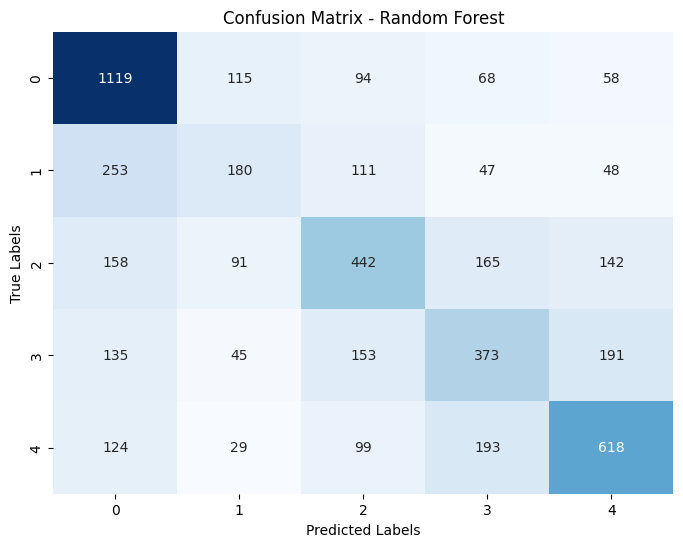

In [ ]:
# Select features based on RFE
X_train_rfe_5 = rfe_5.transform(X_train)
X_test_rfe_5 = rfe_5.transform(X_test)

model_rf_5.fit(X_train_rfe_5,y_train)

# Predict and evaluate the model
y_pred_rf_5 = model_rf_5.predict(X_test_rfe_5)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_5))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69      1454
           1       0.42      0.28      0.34       639
           2       0.49      0.43      0.46       998
           3       0.46      0.42      0.44       897
           4       0.59      0.61      0.60      1063

    accuracy                           0.55      5051
   macro avg       0.52      0.50      0.50      5051
weighted avg       0.53      0.55      0.54      5051



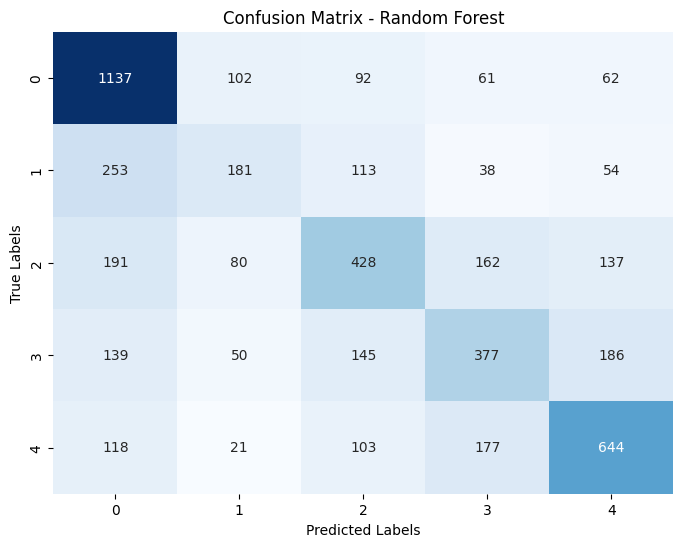

In [ ]:
# Select features based on RFE
X_train_rfe_6 = rfe_6.transform(X_train)
X_test_rfe_6 = rfe_6.transform(X_test)

model_rf_6.fit(X_train_rfe_6,y_train)

# Predict and evaluate the model
y_pred_rf_6 = model_rf_6.predict(X_test_rfe_6)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_6))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_6)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1454
           1       0.47      0.29      0.36       639
           2       0.52      0.47      0.49       998
           3       0.46      0.41      0.43       897
           4       0.63      0.61      0.62      1063

    accuracy                           0.57      5051
   macro avg       0.54      0.52      0.52      5051
weighted avg       0.55      0.57      0.55      5051



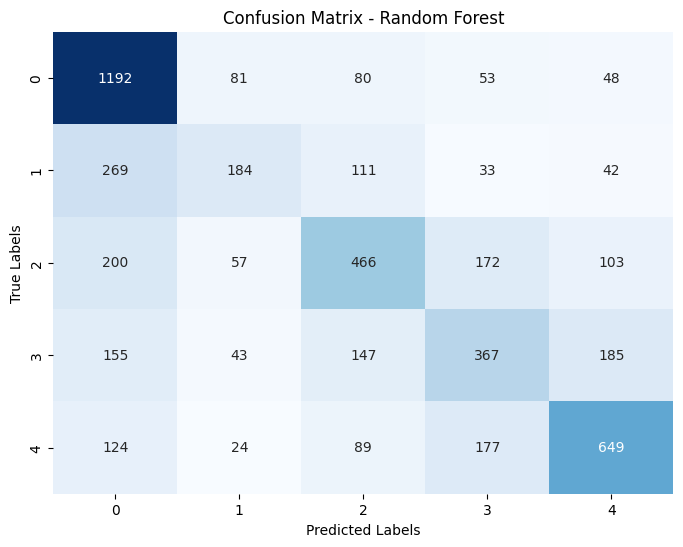

In [ ]:
# Select features based on RFE
X_train_rfe_8 = rfe_8.transform(X_train)
X_test_rfe_8 = rfe_8.transform(X_test)

model_rf_8.fit(X_train_rfe_8,y_train)

# Predict and evaluate the model
y_pred_rf_8 = model_rf_8.predict(X_test_rfe_8)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_8))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_8)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      1454
           1       0.46      0.30      0.36       639
           2       0.54      0.48      0.51       998
           3       0.47      0.44      0.45       897
           4       0.66      0.63      0.65      1063

    accuracy                           0.57      5051
   macro avg       0.55      0.53      0.53      5051
weighted avg       0.56      0.57      0.56      5051



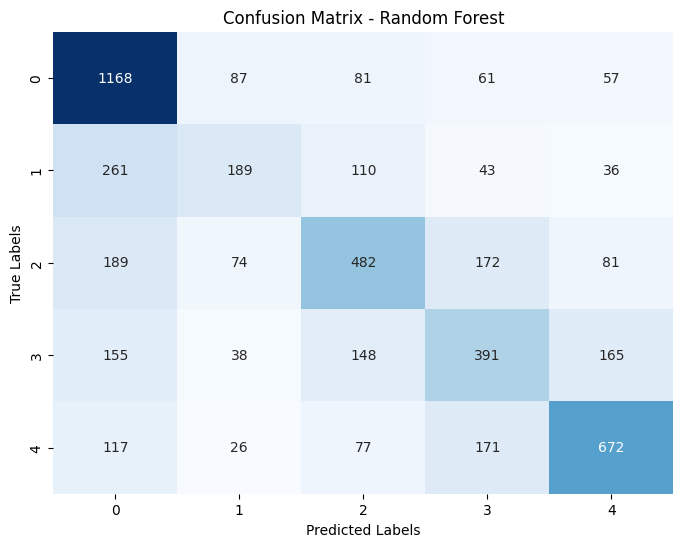

In [ ]:
# Select features based on RFE
X_train_rfe_10 = rfe_10.transform(X_train)
X_test_rfe_10 = rfe_10.transform(X_test)

model_rf_10.fit(X_train_rfe_10,y_train)

# Predict and evaluate the model
y_pred_rf_10 = model_rf_10.predict(X_test_rfe_10)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_10))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_10)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      1454
           1       0.51      0.31      0.38       639
           2       0.56      0.52      0.54       998
           3       0.49      0.44      0.46       897
           4       0.68      0.66      0.67      1063

    accuracy                           0.60      5051
   macro avg       0.58      0.56      0.56      5051
weighted avg       0.59      0.60      0.59      5051



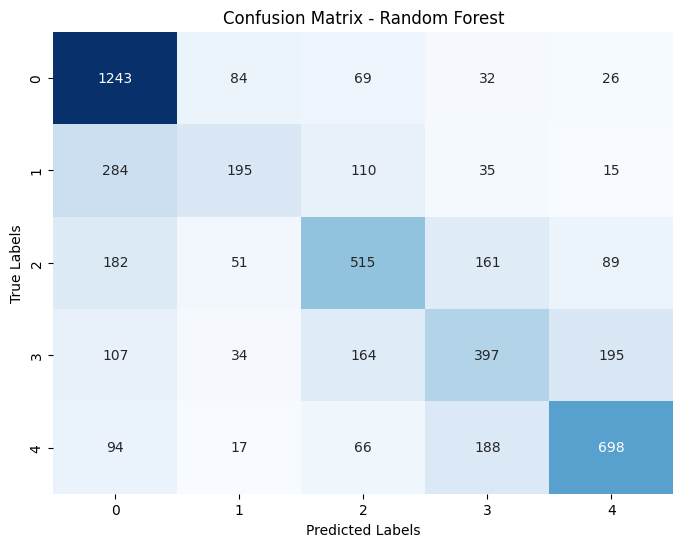

In [ ]:
# Select features based on RFE
X_train_rfe_15 = rfe_15.transform(X_train)
X_test_rfe_15 = rfe_15.transform(X_test)

model_rf_15.fit(X_train_rfe_15,y_train)

# Predict and evaluate the model
y_pred_rf_15 = model_rf_15.predict(X_test_rfe_15)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_15))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_15)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1454
           1       0.49      0.31      0.38       639
           2       0.56      0.51      0.53       998
           3       0.47      0.44      0.45       897
           4       0.68      0.65      0.67      1063

    accuracy                           0.60      5051
   macro avg       0.57      0.55      0.56      5051
weighted avg       0.59      0.60      0.59      5051



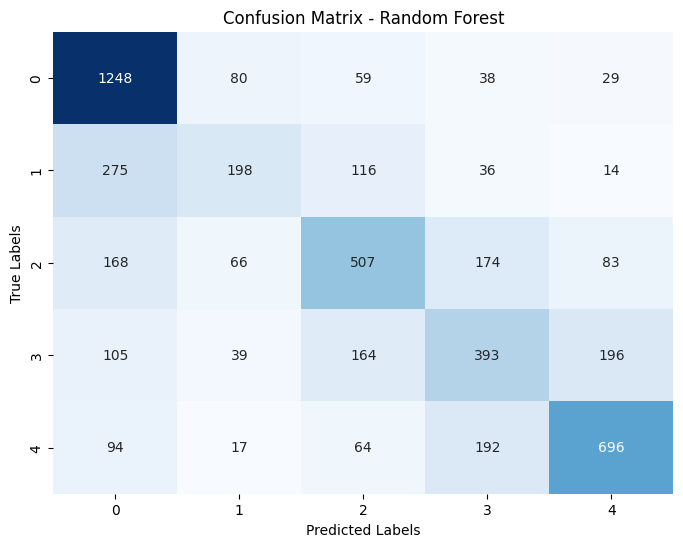

In [ ]:
# Select features based on RFE
X_train_rfe_18 = rfe_18.transform(X_train)
X_test_rfe_18 = rfe_18.transform(X_test)

model_rf_18.fit(X_train_rfe_18,y_train)

# Predict and evaluate the model
y_pred_rf_18 = model_rf_18.predict(X_test_rfe_18)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_18))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_18)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1454
           1       0.50      0.31      0.38       639
           2       0.54      0.50      0.52       998
           3       0.50      0.45      0.47       897
           4       0.70      0.68      0.69      1063

    accuracy                           0.61      5051
   macro avg       0.58      0.56      0.56      5051
weighted avg       0.60      0.61      0.59      5051



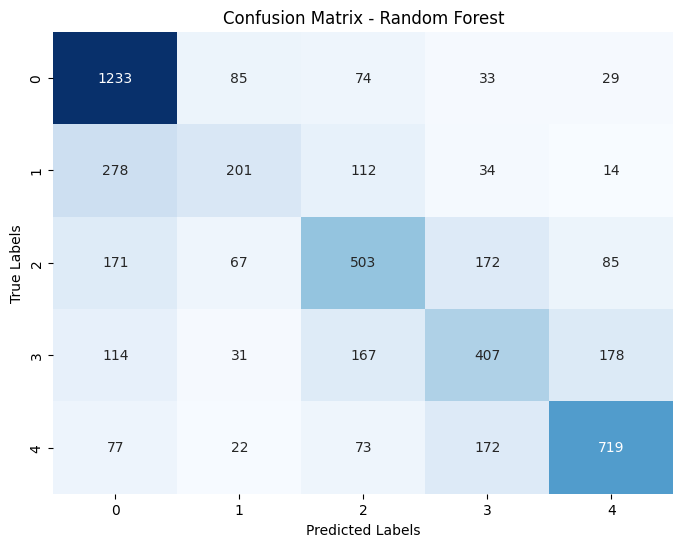

In [ ]:
# Select features based on RFE
X_train_rfe_20 = rfe_20.transform(X_train)
X_test_rfe_20 = rfe_20.transform(X_test)

model_rf_20.fit(X_train_rfe_20,y_train)

# Predict and evaluate the model
y_pred_rf_20 = model_rf_20.predict(X_test_rfe_20)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_20))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_20)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
# Get the ranking of the features
ranking = rfe_20.ranking_
feature_names = X.columns

print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{feature_names[i]}: {ranking[i]}")

Feature ranking:
Type: 22
Breed: 2
Color: 1
Sex: 13
Size: 10
Kennel_Number: 1
Intake_Type: 11
Intake_Subtype: 7
Intake_Condition: 8
Intake_Jurisdiction: 15
Multiple_Visit_Count: 17
Age_inDays_at_Outcome: 1
Age_Group: 19
Is_Aggressive: 20
Has_Name: 9
Is_Fixed: 16
Is_Mixed_Breed: 21
Is_Multicolor: 18
Color_Embedding_Cluster: 12
Breed_Embedding_Cluster: 14
intake_year: 4
intake_month: 3
intake_day: 1
birth_year: 6
birth_month: 5
birth_day: 1


In [53]:
# Define a pipeline combining RFE with a classifier
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('rfe', RFE(estimator=RandomForestClassifier(), n_features_to_select=5, step=1)),
        ('classifier', model)
    ])

# Define parameter grid for RandomForest (example)
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Define parameter grids for other models if needed
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

# Models to try
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'GradientBoosting': (GradientBoostingClassifier(random_state=42), param_grid_gb),
    'XGBoost': (XGBClassifier(random_state=42), param_grid_xgb),
    'LogisticRegression': (LogisticRegression(max_iter=1000, random_state=42), param_grid_lr)
}

best_models = {}
for model_name, (model, param_grid) in models.items():
    pipeline = create_pipeline(model)
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters found for {model_name}: ", grid_search.best_params_)

# Evaluate the best models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 